<a href="https://colab.research.google.com/github/GeunheeHan/2020-2-AI/blob/main/05_mnist_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
#mnist 모듈 준비
mnist = tf.keras.datasets.mnist

In [5]:
#mnist 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
#샘플 값을 정수 (0~255)에서 부동소수 (0~1)로 변환
(x_train, x_test) = x_train / 255.0, x_test / 255.0

In [7]:
#층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성 // 활성화 함수 softmax()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
#훈련에 사용할 옵티마이저 와 손실 함수, 출력 정보 선택
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#모델 요약 포시
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
#모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2923 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1403 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0869 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0736 - accuracy: 0.9775


In [11]:
#모델을 테스트 데이터로 평가
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9770


[0.0768360123038292, 0.9769999980926514]

#테스트 데이터의 텃번째 손글씨 예측 결과 확인

model.predict(input)


In [12]:
#테스트 데이터의 텃번째 손글씨 예측 결과 확인
print(x_test[:1].shape)

pred_result = model.predict(x_test[:1])
print(pred_result.shape)
print(pred_result)
print(pred_result[0])

(1, 28, 28)
(1, 10)
[[1.18029405e-07 3.23097531e-08 8.95617177e-06 6.75962583e-05
  3.70422486e-12 6.72082976e-08 5.24757863e-13 9.99917388e-01
  1.55914677e-06 4.32422348e-06]]
[1.18029405e-07 3.23097531e-08 8.95617177e-06 6.75962583e-05
 3.70422486e-12 6.72082976e-08 5.24757863e-13 9.99917388e-01
 1.55914677e-06 4.32422348e-06]


In [13]:
import numpy as np

#10개의 수를 더하며?
one_pred=pred_result[0]
print(one_pred.sum())

#혹시 가장 큰수가 있는 첨자가 결과
one = np.argmax(one_pred)
print(one)

1.0
7


In [14]:
import numpy as np

#10개의 수를 더하면?
one_pred=pred_result[0]
print(tf.reduce_sum(one_pred))
print(tf.reduce_sum(one_pred).numpy())

#혹시 가장 큰수가 있는 첨자가 결과
print(tf.argmax(one_pred).numpy())

tf.Tensor(1.0, shape=(), dtype=float32)
1.0
7


One Hot Encoding의 이해
  데이터가 취할 수 있는 모든 단일 범주에 대해 하나의 새열을 생성

In [15]:
import numpy as np
###############################

print(np.argmax([5,4,10,1,2]))
print(np.argmax([3,1,4,9,6,7,2]))
print(np.argmax([[0.1,0.8,0.1],[0.7,0.2,0.1],[0.2,0.1,0.7]], axis=1))

2
3
[1 0 2]


In [16]:
import numpy as np


#############################

print(tf.argmax([5,4,10,1,2]))
print(tf.argmax([3,1,4,9,6,7,2]))
print(tf.argmax([[0.1,0.8,0.1],[0.7,0.2,0.1],[0.2,0.1,0.7]], axis=1))

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor([1 0 2], shape=(3,), dtype=int64)


MNIST 손글씨 결과 확인 그림으로

tf.Tensor(1.0, shape=(), dtype=float32)
1.0
7


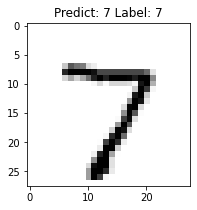

In [18]:
import numpy as np

#10개의 수를 더하면?
one_pred=pred_result[0] #테스트 데이터에 대한 예측값이 있다.
print(tf.reduce_sum(one_pred))
print(tf.reduce_sum(one_pred).numpy())

#혹시 가장 큰수가 있는 첨자가 결과
print(tf.argmax(one_pred).numpy()) #확률 값중 가장 큰 값이 들어간다.

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
tmp = "Predict: "+ str(one) + " Label: " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[0], cmap="Greys") #임시 저장소

In [20]:
#####################################
#간단한 자료 처리
import numpy as np
x=np.array([2,3,254,5,6,3])
x=x/255.0
print(x)

x=x.reshape(2,3)
print(x)

x=x.flatten()
print(x)
#평탄화

[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]
[[0.00784314 0.01176471 0.99607843]
 [0.01960784 0.02352941 0.01176471]]
[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]


In [22]:
data = np.arange(1,11).reshape(5,2).astype(np.float32)
print(data)
np.sum(data)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]


55.0

In [24]:
tf.random.set_seed(0)
layer = tf.keras.layers.Dropout(.3,input_shape=(2,))
outputs = layer(data, training=True)
print(outputs)
np.sum(outputs)

tf.Tensor(
[[ 0.         0.       ]
 [ 4.285714   5.714286 ]
 [ 7.1428576  8.571428 ]
 [10.        11.428572 ]
 [12.857143   0.       ]], shape=(5, 2), dtype=float32)


60.0

In [26]:
from random import sample
import numpy as np

pred_result = model.predict(x_test)
print(pred_result.shape)
print(pred_result[0])
print(np.argmax(pred_result[0]))

#원핫 인코딩
pred_labels = np.argmax(pred_result, axis=1)
#예측 답 
print(pred_labels)
#실제 답
print(y_test)
############################

(10000, 10)
[1.18029625e-07 3.23097531e-08 8.95616358e-06 6.75961928e-05
 3.70424611e-12 6.72082976e-08 5.24758893e-13 9.99917388e-01
 1.55914825e-06 4.32422348e-06]
7
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [27]:
from random import sample
import numpy as np

#예측한 softmax의 확률이 있는 리스트 pred_result
pred_result = model.predict(x_test)

#실제 예측한 정답이 있는 리스트 pred_labels
pred_labels = np.argmax(pred_result, axis=1)

#랜덤하게 20개의 훈련용 자료를 에측 값과 정답, 그림을 그리자
nrows, ncols = 5,4 #출력 가로 세로 수
samples = sorted(sample(range(len(x_test)), nrows * ncols)) # 출력할 첨자 선정

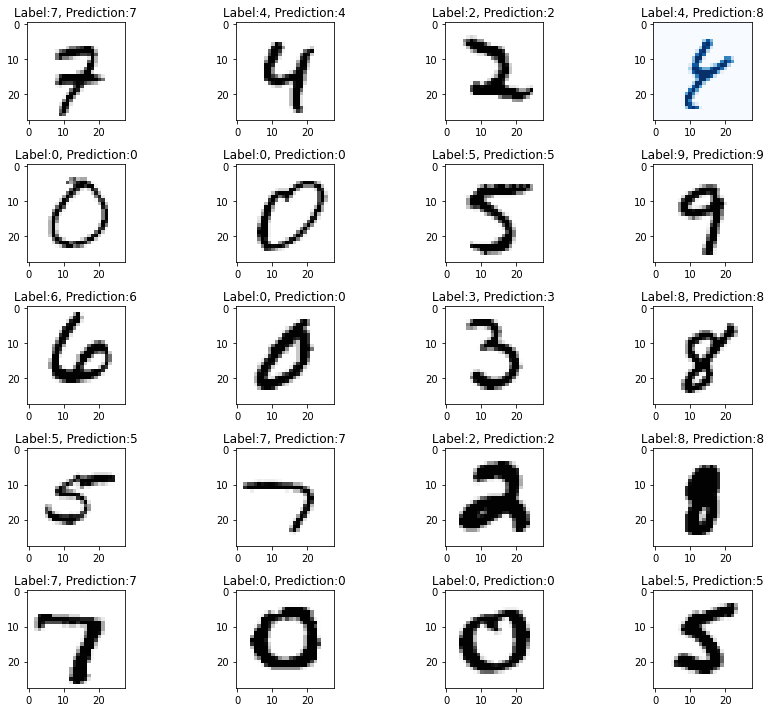

In [28]:
#임의의 20개 그리기
count =0
plt.figure(figsize=(12,10))
for n in samples:
  count+=1
  plt.subplot(nrows, ncols, count)
  #예측이 틀린 것은 파란색으로 그리기
  cmap=  'Greys' if (pred_labels[n] == y_test[n]) else 'Blues'
  plt.imshow(x_test[n].reshape(28,28),cmap=cmap, interpolation='nearest')
  tmp="Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
  plt.title(tmp)
plt.tight_layout()
plt.show()

In [ ]:
#틀린 것을 임의의 20개를 찾아 첨자를 리스트 samples에 저장
from random import sample
import numpy as np

#######################################
#예측이 틀린 것 첨자를 저장할리스트
mispred = []
#예측한 softmax의 확률이 있는 리스트 pred_result
pred_result = model.predict(x_test)

#실제 예측한 정답이 있는 리스트 pred labels
pred_labels = np.argmax(pred_result, axis=1)

for n in range(0,len(y_test)):
  if pred_labels[n] != y_test[n]:
    mispred.append(n)
print('정답이 틀린 수', len(mispred))

#랜덤하게 틀린 것 20개의 첨자 리스트 생성
samples = sample(mispred,20)
print(samples)

정답이 틀린 수 228
[1609, 844, 1319, 1444, 1128, 2433, 4078, 3776, 9679, 947, 6555, 6568, 5331, 6783, 9779, 2016, 4425, 3330, 2040, 1549]


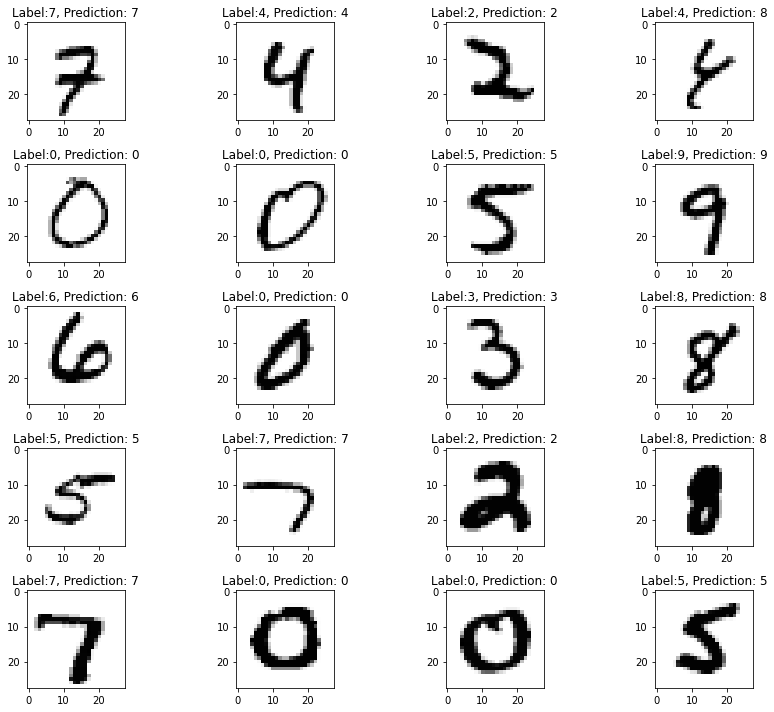

In [30]:
#틀린 것 20개 샘플로 그리기
#틀린 첨자 저장
#mispred
count = 0
nrows, ncols = 5,4
plt.figure(figsize=(12,10))
for n in samples:
  count +=1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(y_test[n]) + ", Prediction: " + str(pred_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()

In [31]:
##중간 고사 시험 MNIST 손글씨 다양한 구현

#층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

#훈련에 사용할 옵티마이저와 손실함수, 출력 정보를 선택
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

#모델 요약표시
model.summary()

#모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

In [33]:
#메소드 flatten() 미사용

import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train /255.0, x_test/255.0
#먼저 reshape()로 평탄화 작업을 수행한 후
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

#층을 차례대로 쌓아 tf.keras.models.Sequential 모델을 생성
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu', input_shape(28 * 28,)),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

#모델 요약 표시
model.summary()

#훈련 사용할 옵티마이저 와 손실함수 , 출력정보를 모델에 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#metrics=['accuracy', 'mse'])

#모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train,y_train,epochs=5)

#모델을 테스트 데이터로 평가
model.evaluate(x_test,y_test)

SyntaxError: ignored